In [0]:
#importing necessary libraries

from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
import copy
from sklearn.manifold import TSNE
import gensim
from gensim import corpora, models, similarities
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.doc2vec import TaggedDocument
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.spatial.distance import cdist
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [2]:
#importing nlkt stopwords
nltk.download('stopwords')
stop_wards = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#importing raw data
data_raw = fetch_20newsgroups()

In [4]:
data_raw.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
data_raw.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [0]:
#tokenising and preprocessing data
tokenizer = RegexpTokenizer('[a-zA-Z][a-zA-Z]+')
stop_words = stopwords.words('english')

In [0]:
token_corp = []
clean_data = []
for d in data_raw.data:
    tokens = tokenizer.tokenize(d)
    tokens = [word.lower() for word in tokens if word not in stop_words]
    token_corp.append(tokens)
    clean_data.append(" ".join(tokens))

In [8]:
clean_data[0]

'from lerxst wam umd edu thing subject what car nntp posting host rac wam umd edu organization university maryland college park lines wondering anyone could enlighten car saw day it door sports car looked late early it called bricklin the doors really small in addition front bumper separate rest body this know if anyone tellme model name engine specs years production car made history whatever info funky looking car please mail thanks il brought neighborhood lerxst'

In [0]:
#converting words to vector
word2vec_model = models.Word2Vec(token_corp, min_count=10, size = 100)

In [10]:
#vector for words which are similar to car
print(word2vec_model.wv['car'])
print(word2vec_model.wv.vocab['car'])

[-0.28369385  0.01859728  0.44989222  0.18031384  0.7034528   1.9073092
  1.8007833   0.62101233  0.45913002  0.81038994  0.28782737 -0.72086954
  0.00753789  0.47260022  0.18625368  0.0565647   1.7403187   0.5499326
  1.5141895   1.3955814  -0.12878418  0.37679595 -0.9165932  -2.001698
  0.64256763 -1.0563637   0.8636037  -0.4596077  -1.8955531  -0.01468012
 -0.49247277  0.36164197  0.2364982  -0.00355238 -1.2945051  -0.6738714
 -0.17531256 -0.06155552 -0.17213091 -0.26790577 -1.6554574   1.2699039
 -0.04206331  0.38777792  0.7526783  -0.21593715  0.67423767 -2.072812
 -2.42609    -1.2695332  -0.43183914  1.3365687  -0.19593276  0.63414925
 -1.9130857  -0.20128696 -0.6013021  -0.87721235  0.03417283  0.09403624
  1.024519   -1.3781499   1.3365525   0.5885346  -0.05012642  1.0817188
  1.2986896   1.2642852   1.0891559  -1.210908    1.4772561   1.3731762
  0.28866443 -0.4306599   1.4954008   0.8022935  -0.3974366   0.5555471
  0.0494975  -1.870197   -1.8378016   1.63773    -0.3507497   

In [11]:
print("Vocabulary Size: {}".format(len(word2vec_model.wv.vocab)))

Vocabulary Size: 18159


In [12]:
#words which are similar to car
print(*word2vec_model.wv.most_similar('car'), sep="\n")

('cars', 0.8673100471496582)
('owner', 0.8397199511528015)
('dealer', 0.8344981670379639)
('bike', 0.8289649486541748)
('tires', 0.8190743923187256)
('bikes', 0.8125172853469849)
('selling', 0.8053480386734009)
('motorcycle', 0.8016400933265686)
('buying', 0.7930535078048706)
('bought', 0.7916362881660461)


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [13]:
print(*word2vec_model.wv.most_similar(positive=['girl', 'father'], negative=['boy']), sep="\n")

('son', 0.8429040312767029)
('mother', 0.826892614364624)
('empty', 0.8167796730995178)
('fell', 0.7857675552368164)
('eye', 0.784527063369751)
('his', 0.7837414145469666)
('spirit', 0.780867338180542)
('crucified', 0.7804182767868042)
('blood', 0.7774472832679749)
('burned', 0.7666394710540771)


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [14]:
print(*word2vec_model.wv.most_similar(positive=['sports', 'ball'], negative=['bat']), sep="\n")

('tonight', 0.8376573324203491)
('late', 0.8108965158462524)
('fans', 0.7995952367782593)
('morning', 0.7923319339752197)
('playoffs', 0.7849382162094116)
('braves', 0.784470796585083)
('watching', 0.7835614681243896)
('penguins', 0.7830134630203247)
('sharks', 0.7791795134544373)
('winning', 0.7676315307617188)


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [15]:
#grouping of similar words and plotting
words = ['baseball', 'software', 'police', 'government', 'circuit', 'car']

plot_words = copy.deepcopy(words)

for w in words:
    t = [tup[0] for tup in word2vec_model.wv.most_similar(w, topn=20)]
    plot_words.extend(t)

print(*plot_words, sep=', ')

baseball, software, police, government, circuit, car, players, espn, nhl, hockey, fans, team, stats, playoff, game, phillies, braves, playoffs, teams, yankees, league, sports, pens, stadium, watching, coach, hardware, machines, network, macintosh, platforms, computers, electronics, graphics, product, multimedia, applications, amiga, vendor, developers, unix, packages, workstations, technologies, networks, platform, federal, tax, officers, income, concealed, governments, officer, taxes, officials, cops, armed, guard, funds, citizen, reform, community, lawyers, affairs, gang, foreign, interests, citizens, authorities, citizen, federal, legal, agents, legitimate, reform, americans, protecting, regulation, demand, agencies, protect, officials, criminal, private, elected, restrictions, capability, signals, frequency, amp, signal, resolution, installation, inputs, connections, components, controls, receiver, storage, configuration, sampling, input, feature, panel, transmission, circuits, car

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


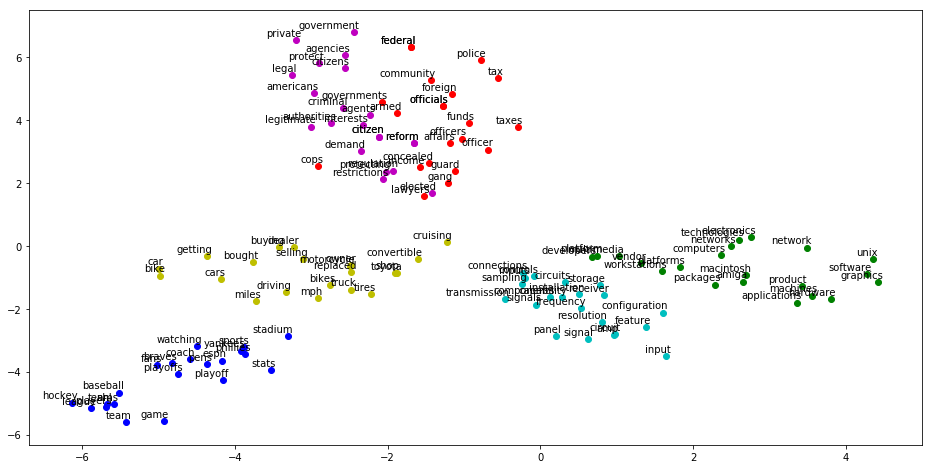

In [16]:
labels = []
tokens = []
color_lst = ['b', 'g', 'r', 'm', 'c', 'y']

for word in plot_words:
    tokens.append(word2vec_model.wv[word])
    labels.append(word)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=3000)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 8)) 
for i in range(len(x)):
    res = map(word2vec_model.wv.similarity, [labels[i] for j in range(len(words))], words)
    t = np.argmax(list(res))
    plt.scatter(x[i],y[i], c=color_lst[t])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()